In [1]:
import re
import time
import pickle
import os
import numpy as np
import pandas as pd
from itertools import *
from sqlalchemy import create_engine
from sqlalchemy.pool import NullPool
from textwrap import dedent
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer, StandardScaler
from sklearn.feature_selection import VarianceThreshold
import datetime
import math
# from plotnine import *
from sklearn.metrics import brier_score_loss
from sklearn.utils import column_or_1d

In [2]:
%%time
import time
import pickle
import os
import numpy as np
import pandas as pd
from itertools import *
from sqlalchemy import create_engine
from sqlalchemy.pool import NullPool
from textwrap import dedent
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns
import xgboost
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer, StandardScaler
from sklearn.feature_selection import VarianceThreshold
import datetime

CPU times: user 7.73 ms, sys: 0 ns, total: 7.73 ms
Wall time: 7.18 ms


In [3]:
df = pd.read_csv('../data/ne_cd_2_l2_2016_10_03_featureset_1335.csv', error_bad_lines=False)

In [4]:
df.columns.tolist()

['Unnamed: 0',
 'ispsa',
 'dwelling_type_single_family_dwelling_unit',
 'dwelling_type_multi_family_dwelling',
 'dwelling_type_null',
 'dwelling_unit_size_1_single_family_dwelling',
 'dwelling_unit_size_10_19',
 'dwelling_unit_size_5_9',
 'dwelling_unit_size_20_49',
 'dwelling_unit_size_50_100',
 'dwelling_unit_size_101',
 'dwelling_unit_size_2_duplex',
 'dwelling_unit_size_4',
 'dwelling_unit_size_3_triplex',
 'dwelling_unit_size_null',
 'estimated_income_amount',
 'hh_upscale_buyer',
 'hh_upscale_male_buyer',
 'hh_upscale_female_buyer',
 'hh_book_buyer',
 'hh_family_magazine',
 'hh_female_oriented_magazine',
 'hh_religious_magazine',
 'hh_gardening_magazine',
 'hh_culinary_interest_magazine',
 'hh_health_fitness_magazine',
 'hh_do_it_yourselfer_magazine',
 'hh_financial_magazine',
 'hh_religious_contributor',
 'hh_political_contributer',
 'hh_donates_environment_cause_u',
 'hh_donates_environment_cause_y',
 'hh_donates_environment_cause_null',
 'hh_donates_to_charity_y',
 'hh_donates

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330917 entries, 0 to 330916
Columns: 512 entries, Unnamed: 0 to lalvoterid
dtypes: float64(510), int64(1), object(1)
memory usage: 1.3+ GB


In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:
df.shape

(330917, 512)

In [8]:
df['occupation_industry_null']

0         1.0
1         1.0
2         0.0
3         0.0
4         1.0
5         1.0
6         1.0
7         1.0
8         1.0
9         0.0
10        0.0
11        0.0
12        1.0
13        1.0
14        1.0
15        0.0
16        1.0
17        0.0
18        1.0
19        1.0
20        1.0
21        1.0
22        1.0
23        1.0
24        1.0
25        1.0
26        1.0
27        1.0
28        1.0
29        0.0
         ... 
330887    0.0
330888    1.0
330889    1.0
330890    1.0
330891    0.0
330892    0.0
330893    1.0
330894    1.0
330895    1.0
330896    1.0
330897    1.0
330898    1.0
330899    0.0
330900    1.0
330901    0.0
330902    0.0
330903    1.0
330904    1.0
330905    1.0
330906    1.0
330907    1.0
330908    1.0
330909    1.0
330910    1.0
330911    1.0
330912    1.0
330913    0.0
330914    1.0
330915    1.0
330916    0.0
Name: occupation_industry_null, Length: 330917, dtype: float64

In [9]:
df[['hh_buyer_art', 'home_office', 'investor']].head()

,hh_buyer_art,home_office,investor
0,0.0,0.0,0.0
1,0.0,0.0,1.0
2,0.0,1.0,1.0
3,0.0,0.0,0.0
4,0.0,1.0,0.0


In [10]:
df.loc[894]

Unnamed: 0                                             894
ispsa                                                    6
dwelling_type_single_family_dwelling_unit                1
dwelling_type_multi_family_dwelling                      0
dwelling_type_null                                       0
dwelling_unit_size_1_single_family_dwelling              1
dwelling_unit_size_10_19                                 0
dwelling_unit_size_5_9                                   0
dwelling_unit_size_20_49                                 0
dwelling_unit_size_50_100                                0
dwelling_unit_size_101                                   0
dwelling_unit_size_2_duplex                              0
dwelling_unit_size_4                                     0
dwelling_unit_size_3_triplex                             0
dwelling_unit_size_null                                  0
estimated_income_amount                             125000
hh_upscale_buyer                                        

In [11]:
df[['home_purchase_price', 'land_value']].mean()

home_purchase_price    122312.658330
land_value              24374.710233
dtype: float64

In [12]:
hpp_mean=df[['home_purchase_price']].mean()
hpp_mean

home_purchase_price    122312.65833
dtype: float64

In [13]:
df.groupby('home_purchase_price')['land_value'].mean()

home_purchase_price
0.0           19346.134977
20000.0       18340.277778
21000.0       19901.639344
22000.0       14989.130435
23000.0       14721.518987
24000.0       17220.930233
25000.0       20748.768473
26000.0       20534.482759
27000.0       17357.142857
28000.0       18726.618705
29000.0       16328.125000
30000.0       17970.588235
31000.0       22504.672897
32000.0       22887.573964
33000.0       16582.278481
34000.0       16483.870968
35000.0       21157.509158
36000.0       16208.588957
37000.0       17563.636364
38000.0       20240.223464
39000.0       17095.022624
40000.0       19156.923077
41000.0       16770.992366
42000.0       16818.681319
43000.0       14495.798319
44000.0       15717.647059
45000.0       22173.501577
46000.0       16422.680412
47000.0       17681.564246
48000.0       17554.545455
                 ...      
1755000.0    140000.000000
1760000.0     21000.000000
1767000.0    170000.000000
1790000.0     18000.000000
1800000.0    139333.333333
1830000.

In [14]:
df['mosaic_z4_boomers_and_boomerangs']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
5         0.0
6         0.0
7         0.0
8         0.0
9         0.0
10        0.0
11        0.0
12        0.0
13        0.0
14        0.0
15        0.0
16        0.0
17        0.0
18        0.0
19        0.0
20        0.0
21        0.0
22        0.0
23        0.0
24        0.0
25        0.0
26        0.0
27        0.0
28        0.0
29        0.0
         ... 
330887    0.0
330888    0.0
330889    0.0
330890    0.0
330891    0.0
330892    0.0
330893    0.0
330894    0.0
330895    0.0
330896    0.0
330897    0.0
330898    0.0
330899    0.0
330900    0.0
330901    0.0
330902    0.0
330903    0.0
330904    0.0
330905    0.0
330906    0.0
330907    0.0
330908    0.0
330909    0.0
330910    0.0
330911    0.0
330912    0.0
330913    0.0
330914    0.0
330915    0.0
330916    1.0
Name: mosaic_z4_boomers_and_boomerangs, Length: 330917, dtype: float64

In [15]:
df.isnull().sum().tolist()

[0,
 6098,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 5533,
 144992,
 144992,
 144992,
 144992,
 144992,
 144992,
 144992,
 144992,
 144992,
 144992,
 144992,
 144992,
 138132,
 120046,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 144992,
 208994,
 144992,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6278,
 6098,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6098,
 6098,
 6098,
 6098,
 6098,
 6098,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 

In [16]:
print(df.describe())

          Unnamed: 0          ispsa  \
count  330917.000000  324819.000000   
mean   165458.000000       6.112863   
std     95527.653852       2.990495   
min         0.000000       0.000000   
25%     82729.000000       4.000000   
50%    165458.000000       7.000000   
75%    248187.000000       9.000000   
max    330916.000000       9.000000   

       dwelling_type_single_family_dwelling_unit  \
count                              330917.000000   
mean                                    0.625154   
std                                     0.484084   
min                                     0.000000   
25%                                     0.000000   
50%                                     1.000000   
75%                                     1.000000   
max                                     1.000000   

       dwelling_type_multi_family_dwelling  dwelling_type_null  \
count                        330917.000000       330917.000000   
mean                              0.153706     

(array([19030., 21720., 23885., 24596., 22093., 21998., 17555., 23134.,
        25749., 25099., 23012., 20206., 15195.,  8805.,  8622.,  6564.,
         4769.,  2974.,  1499.,   480.]),
 array([18.  , 21.85, 25.7 , 29.55, 33.4 , 37.25, 41.1 , 44.95, 48.8 ,
        52.65, 56.5 , 60.35, 64.2 , 68.05, 71.9 , 75.75, 79.6 , 83.45,
        87.3 , 91.15, 95.  ]),
 <a list of 20 Patch objects>)

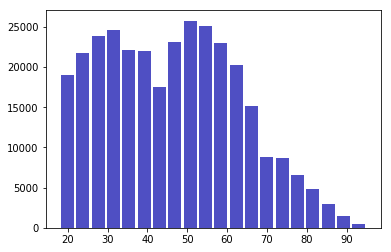

In [17]:
plt.hist(x=df['age'].dropna(), bins=20, color='#0504aa',
                            alpha=0.7, rwidth=0.85)

(array([53465., 83370., 90747., 58269., 15095.,  9143.,  4058., 11237.]),
 array([  6000.,  36500.,  67000.,  97500., 128000., 158500., 189000.,
        219500., 250000.]),
 <a list of 8 Patch objects>)

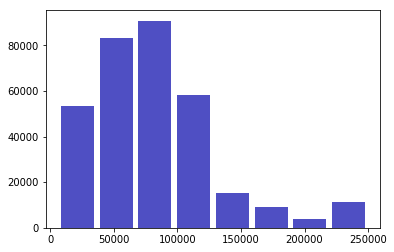

In [18]:
plt.hist(x=df['estimated_income_amount'].dropna(), bins=8, color='#0504aa',
                            alpha=0.7, rwidth=0.85)

(array([257738.,  73179.]),
 array([0. , 0.5, 1. ]),
 <a list of 2 Patch objects>)

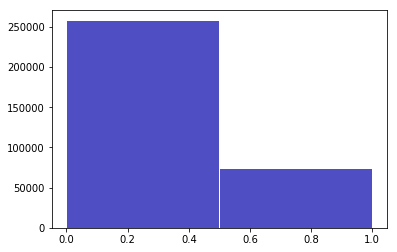

In [19]:
plt.hist(x=df['dwelling_type_null'].dropna(), bins=2, color='#0504aa',
                            alpha=0.7, rwidth=0.99)

(array([185925., 144992.]),
 array([0. , 0.5, 1. ]),
 <a list of 2 Patch objects>)

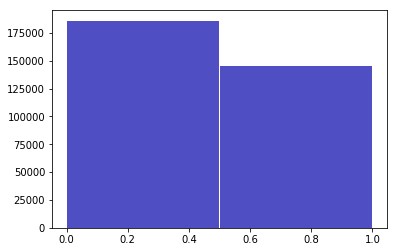

In [20]:
plt.hist(x=df['hh_computer_owner_null'].dropna(), bins=2, color='#0504aa',
                            alpha=0.7, rwidth=0.99)

/home/marzuqkhan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


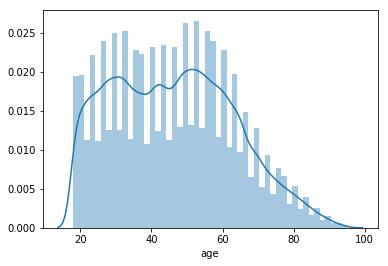

In [21]:
sns.distplot(df['age'].dropna())

(array([311763.,   5222.]),
 array([0. , 0.5, 1. ]),
 <a list of 2 Patch objects>)

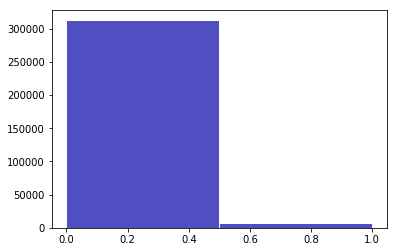

In [22]:
plt.hist(x=df['voted_20g'].dropna(), bins=2, color='#0504aa',
                            alpha=0.7, rwidth=0.99)

In [23]:
sum(df['voted_28g'].dropna())

540.0

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f85d53ff898>,
      dtype=object)

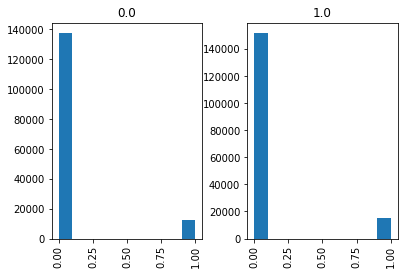

In [24]:
df['voted_18g'].hist(by=df['gender_f'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f85d9294978>,
      dtype=object)

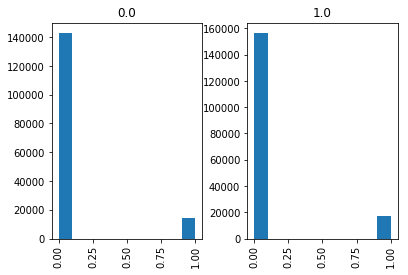

In [25]:
df['education_hs_diploma_extremely_likely'].hist(by=df['gender_f'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f85d4fe2f98>,
      dtype=object)

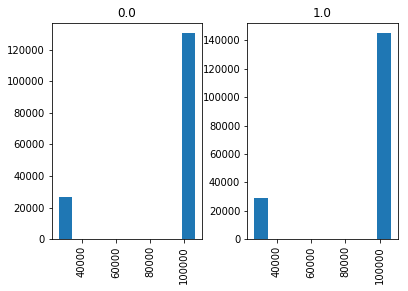

In [26]:
df['g12_vote_obama_d'].hist(by=df['gender_f'])

In [27]:
test1=pd.DataFrame(df['estimated_income_amount'].dropna(), 
                   df['home_office'].dropna(),
                  columns=['estimated_income_amount', 'home_office'])

In [28]:
print(df['home_office'])

0         0.0
1         0.0
2         1.0
3         0.0
4         1.0
5         1.0
6         0.0
7         0.0
8         0.0
9         1.0
10        1.0
11        1.0
12        1.0
13        0.0
14        0.0
15        0.0
16        0.0
17        0.0
18        0.0
19        0.0
20        0.0
21        0.0
22        0.0
23        0.0
24        1.0
25        0.0
26        0.0
27        0.0
28        1.0
29        0.0
         ... 
330887    1.0
330888    0.0
330889    0.0
330890    0.0
330891    1.0
330892    0.0
330893    0.0
330894    0.0
330895    0.0
330896    0.0
330897    0.0
330898    1.0
330899    0.0
330900    0.0
330901    0.0
330902    0.0
330903    0.0
330904    0.0
330905    0.0
330906    0.0
330907    0.0
330908    1.0
330909    0.0
330910    0.0
330911    0.0
330912    0.0
330913    0.0
330914    0.0
330915    0.0
330916    0.0
Name: home_office, Length: 330917, dtype: float64


In [29]:
from sklearn.base import TransformerMixin
# Imputes missing values
class DataFrameImputer(TransformerMixin):
    def fit(self, X, y=None):
        self.fill = pd.Series([X[c].value_counts().index[0]
            if ( (X[c].dtype == np.dtype('O')) | (X[c].dtype.name =='category')) else X[c].median() for c in X],
            index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [30]:
df.columns.tolist()

['Unnamed: 0',
 'ispsa',
 'dwelling_type_single_family_dwelling_unit',
 'dwelling_type_multi_family_dwelling',
 'dwelling_type_null',
 'dwelling_unit_size_1_single_family_dwelling',
 'dwelling_unit_size_10_19',
 'dwelling_unit_size_5_9',
 'dwelling_unit_size_20_49',
 'dwelling_unit_size_50_100',
 'dwelling_unit_size_101',
 'dwelling_unit_size_2_duplex',
 'dwelling_unit_size_4',
 'dwelling_unit_size_3_triplex',
 'dwelling_unit_size_null',
 'estimated_income_amount',
 'hh_upscale_buyer',
 'hh_upscale_male_buyer',
 'hh_upscale_female_buyer',
 'hh_book_buyer',
 'hh_family_magazine',
 'hh_female_oriented_magazine',
 'hh_religious_magazine',
 'hh_gardening_magazine',
 'hh_culinary_interest_magazine',
 'hh_health_fitness_magazine',
 'hh_do_it_yourselfer_magazine',
 'hh_financial_magazine',
 'hh_religious_contributor',
 'hh_political_contributer',
 'hh_donates_environment_cause_u',
 'hh_donates_environment_cause_y',
 'hh_donates_environment_cause_null',
 'hh_donates_to_charity_y',
 'hh_donates

In [31]:
from datetime import datetime, timedelta

In [32]:
df['today'] = pd.Series(datetime.today(), index=df.index)

In [33]:
df

,Unnamed: 0,ispsa,dwelling_type_single_family_dwelling_unit,dwelling_type_multi_family_dwelling,dwelling_type_null,dwelling_unit_size_1_single_family_dwelling,dwelling_unit_size_10_19,dwelling_unit_size_5_9,dwelling_unit_size_20_49,dwelling_unit_size_50_100,...,age_cubed,age_null,age_18_34,age_35_54,age_55_plus,birth_date_offset,calculated_reg_date_offset,official_reg_date_offset,lalvoterid,today
0,0,9.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,74088.0,0.0,0.0,1.0,0.0,15499.0,5147.0,678.0,LALNE1000028,2019-03-06 10:46:26.399652
1,1,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,205379.0,0.0,0.0,0.0,1.0,21684.0,-1210.0,-1210.0,LALNE1000039,2019-03-06 10:46:26.399652
2,2,9.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,79507.0,0.0,0.0,1.0,0.0,15911.0,5147.0,188.0,LALNE1000127,2019-03-06 10:46:26.399652
3,3,7.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,32768.0,0.0,1.0,0.0,0.0,11858.0,2956.0,1463.0,LALNE100016,2019-03-06 10:46:26.399652
4,4,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,117649.0,0.0,0.0,1.0,0.0,18013.0,4412.0,-378.0,LALNE1000199,2019-03-06 10:46:26.399652
5,5,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,592704.0,0.0,0.0,0.0,1.0,30820.0,5147.0,819.0,LALNE1000238,2019-03-06 10:46:26.399652
6,6,6.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,97336.0,0.0,0.0,1.0,0.0,16880.0,3128.0,3128.0,LALNE100026,2019-03-06 10:46:26.399652
7,7,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,27000.0,0.0,1.0,0.0,0.0,11120.0,3128.0,3128.0,LALNE100029,2019-03-06 10:46:26.399652
8,8,9.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,32768.0,0.0,1.0,0.0,0.0,11674.0,2190.0,2190.0,LALNE1000320,2019-03-06 10:46:26.399652
9,9,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,132651.0,0.0,0.0,1.0,0.0,18724.0,5322.0,-681.0,LALNE1000372,2019-03-06 10:46:26.399652


In [34]:
dates = df['birth_date_offset'].values.astype('int64')

In [35]:
dates

array([15499, 21684, 15911, ..., 12880, 12336, 17409])

In [36]:
dates1=df['birth_date_offset'].dropna().astype('timedelta64[D]')

In [37]:
dates1

0        15499 days
1        21684 days
2        15911 days
3        11858 days
4        18013 days
5        30820 days
6        16880 days
7        11120 days
8        11674 days
9        18724 days
10       17795 days
11       18697 days
12       17297 days
13        9707 days
14       20151 days
15       19047 days
16       13828 days
17       17916 days
18       14974 days
19       17399 days
20       14621 days
21       18574 days
22       15065 days
23       22309 days
24       19706 days
25       22812 days
26       22524 days
27       18226 days
28        9726 days
29       23934 days
            ...    
330887   14722 days
330888   11452 days
330889   18028 days
330890   17170 days
330891    9600 days
330892   28582 days
330893   11022 days
330894   12524 days
330895   16206 days
330896   14404 days
330897   12068 days
330898   26674 days
330899   11348 days
330900   11231 days
330901   20298 days
330902   11367 days
330903   17843 days
330904   14072 days
330905   25937 days


In [38]:
df['today_delta'] = df['today'] - dates1

In [39]:
df['birth_date_offset']

0         15499.0
1         21684.0
2         15911.0
3         11858.0
4         18013.0
5         30820.0
6         16880.0
7         11120.0
8         11674.0
9         18724.0
10        17795.0
11        18697.0
12        17297.0
13         9707.0
14        20151.0
15        19047.0
16        13828.0
17        17916.0
18        14974.0
19        17399.0
20        14621.0
21        18574.0
22        15065.0
23        22309.0
24        19706.0
25        22812.0
26        22524.0
27        18226.0
28         9726.0
29        23934.0
           ...   
330887    14722.0
330888    11452.0
330889    18028.0
330890    17170.0
330891     9600.0
330892    28582.0
330893    11022.0
330894    12524.0
330895    16206.0
330896    14404.0
330897    12068.0
330898    26674.0
330899    11348.0
330900    11231.0
330901    20298.0
330902    11367.0
330903    17843.0
330904    14072.0
330905    25937.0
330906    11844.0
330907     9577.0
330908    20239.0
330909    15676.0
330910    17295.0
330911    

In [40]:
df

,Unnamed: 0,ispsa,dwelling_type_single_family_dwelling_unit,dwelling_type_multi_family_dwelling,dwelling_type_null,dwelling_unit_size_1_single_family_dwelling,dwelling_unit_size_10_19,dwelling_unit_size_5_9,dwelling_unit_size_20_49,dwelling_unit_size_50_100,...,age_null,age_18_34,age_35_54,age_55_plus,birth_date_offset,calculated_reg_date_offset,official_reg_date_offset,lalvoterid,today,today_delta
0,0,9.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,15499.0,5147.0,678.0,LALNE1000028,2019-03-06 10:46:26.399652,1976-09-28 10:46:26.399652
1,1,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,21684.0,-1210.0,-1210.0,LALNE1000039,2019-03-06 10:46:26.399652,1959-10-23 10:46:26.399652
2,2,9.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,15911.0,5147.0,188.0,LALNE1000127,2019-03-06 10:46:26.399652,1975-08-13 10:46:26.399652
3,3,7.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,11858.0,2956.0,1463.0,LALNE100016,2019-03-06 10:46:26.399652,1986-09-17 10:46:26.399652
4,4,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,18013.0,4412.0,-378.0,LALNE1000199,2019-03-06 10:46:26.399652,1969-11-10 10:46:26.399652
5,5,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,30820.0,5147.0,819.0,LALNE1000238,2019-03-06 10:46:26.399652,1934-10-18 10:46:26.399652
6,6,6.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,16880.0,3128.0,3128.0,LALNE100026,2019-03-06 10:46:26.399652,1972-12-17 10:46:26.399652
7,7,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,11120.0,3128.0,3128.0,LALNE100029,2019-03-06 10:46:26.399652,1988-09-24 10:46:26.399652
8,8,9.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,11674.0,2190.0,2190.0,LALNE1000320,2019-03-06 10:46:26.399652,1987-03-20 10:46:26.399652
9,9,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,18724.0,5322.0,-681.0,LALNE1000372,2019-03-06 10:46:26.399652,1967-11-30 10:46:26.399652


In [41]:
bp1=df.groupby(['voted_18g'])
bp1

In [42]:
import statsmodels.api as sm
model = sm.formula.glm("voted_18g ~ home_purchase_price + age + land_value + estimated_home_value + estimated_median_income",
                       family=sm.families.Binomial(), data=df).fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              voted_18g   No. Observations:               181838
Model:                            GLM   Df Residuals:                   181832
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -55645.
Date:                Wed, 06 Mar 2019   Deviance:                   1.1129e+05
Time:                        10:46:27   Pearson chi2:                 1.65e+05
No. Iterations:                     6   Covariance Type:             nonrobust
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -4.6582      0.040   -117.680      0.000      -4.736      -4.581
home_purchase

In [43]:
import statsmodels.api as sm
model = sm.formula.glm("voted_18g~hh_upscale_buyer+hh_upscale_male_buyer+hh_upscale_female_buyer+hh_book_buyer+hh_family_magazine+hh_female_oriented_magazine+hh_religious_magazine+hh_gardening_magazine+hh_culinary_interest_magazine+hh_health_fitness_magazine+hh_do_it_yourselfer_magazine+hh_financial_magazine+hh_religious_contributor+hh_political_contributer+hh_donates_environment_cause_u+hh_donates_environment_cause_y+hh_donates_environment_cause_null+hh_donates_to_charity_y+hh_donates_to_charity_u+hh_donates_to_charity_null+hh_presence_of_prem_cred_crd_u+hh_presence_of_prem_cred_crd_y+hh_presence_of_prem_cred_crd_null+hh_computer_owner_y+hh_computer_owner_u+hh_computer_owner_null",
                       family=sm.families.Binomial(), data=df).fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              voted_18g   No. Observations:               182620
Model:                            GLM   Df Residuals:                   182601
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -58096.
Date:                Wed, 06 Mar 2019   Deviance:                   1.1619e+05
Time:                        10:46:41   Pearson chi2:                 1.85e+05
No. Iterations:                   100   Covariance Type:             nonrobust
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                         -1.779e+11   5.84e+11     -0.305      0.761   -1.32

/home/marzuqkhan/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/home/marzuqkhan/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/marzuqkhan/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/marzuqkhan/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [44]:
model = sm.formula.glm("voted_18g~hh_upscale_male_buyer+hh_book_buyer+hh_family_magazine+hh_culinary_interest_magazine+hh_health_fitness_magazine+hh_financial_magazine+hh_religious_contributor+hh_political_contributer+hh_presence_of_prem_cred_crd_null+hh_computer_owner_null",
                       family=sm.families.Binomial(), data=df).fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              voted_18g   No. Observations:               182620
Model:                            GLM   Df Residuals:                   182611
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -58508.
Date:                Wed, 06 Mar 2019   Deviance:                   1.1702e+05
Time:                        10:46:42   Pearson chi2:                 1.81e+05
No. Iterations:                     5   Covariance Type:             nonrobust
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -2.4362      0.011   -224.873      0.000      -2

In [45]:
model = sm.formula.glm("voted_18g~occupation_industry_other+occupation_industry_medical+occupation_industry_management+occupation_industry_clericaloffice+occupation_industry_manufacturing+occupation_industry_financial_services+occupation_industry_skilled_trades+occupation_industry_education+occupation_industry_military+occupation_industry_computer_professional+occupation_industry_legal+occupation_industry_engineering+occupation_industry_civil_servant+occupation_industry_food_services+occupation_industry_salesmarketing+occupation_industry_other_other+occupation_industry_null",
                       family=sm.families.Binomial(), data=df).fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              voted_18g   No. Observations:               316985
Model:                            GLM   Df Residuals:                   316968
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -92748.
Date:                Wed, 06 Mar 2019   Deviance:                   1.8550e+05
Time:                        10:46:59   Pearson chi2:                 3.24e+05
No. Iterations:                   100   Covariance Type:             nonrobust
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                  -1.27e+10    9.2e+10     -

In [46]:
model = sm.formula.glm("voted_18g~ethnicity_european+ethnicity_likely_african_american+ethnicity_hispanic_and_portuguese+ethnicity_other+ethnicity_east_and_south_asian+ethnicity_null",
                       family=sm.families.Binomial(), data=df).fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              voted_18g   No. Observations:               316985
Model:                            GLM   Df Residuals:                   316979
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -93064.
Date:                Wed, 06 Mar 2019   Deviance:                   1.8613e+05
Time:                        10:47:04   Pearson chi2:                 3.17e+05
No. Iterations:                   100   Covariance Type:             nonrobust
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                          3.992e+08   2.14e+11      0.002      0.999   -4.19

In [47]:
model = sm.formula.glm("voted_18g~religion_protestant+religion_catholic+religion_jewish+religion_christian+religion_eastern_orthodox+religion_buddhist+religion_islamic+religion_hindu+religion_greek_orthodox+religion_shinto+religion_lutheran+religion_mormon+religion_sikh+religion_null",
                       family=sm.families.Binomial(), data=df).fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              voted_18g   No. Observations:               316985
Model:                            GLM   Df Residuals:                   316971
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -92306.
Date:                Wed, 06 Mar 2019   Deviance:                   1.8461e+05
Time:                        10:47:17   Pearson chi2:                 3.14e+05
No. Iterations:                   100   Covariance Type:             nonrobust
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                 -1.149e+10   7.15e+10     -0.161      0.872   -1.52e+11    1.29e+11
religio

In [48]:
from l2features import *

In [62]:
featureset_ne = pd.read_csv('../data/ne_cd_2_l2_2016_10_03_featureset_1335.csv', error_bad_lines=False)

In [57]:
from sklearn.base import TransformerMixin
# Imputes missing values
class DataFrameImputer(TransformerMixin):
    def fit(self, X, y=None):
        self.fill = pd.Series([X[c].value_counts().index[0]
            if ( (X[c].dtype == np.dtype('O')) | (X[c].dtype.name =='category')) else X[c].median() for c in X],
            index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [66]:
connection = cm_engine.connect()
query5 = dedent(f"""
    select  *
        from "{featureset_ne}";
        """)
print('---- loading train featureset ------')
featureset_train = pd.read_sql_query(query5, connection)

NameError: name 'cm_engine' is not defined

In [63]:
featureset_ne.head()

,Unnamed: 0,ispsa,dwelling_type_single_family_dwelling_unit,dwelling_type_multi_family_dwelling,dwelling_type_null,dwelling_unit_size_1_single_family_dwelling,dwelling_unit_size_10_19,dwelling_unit_size_5_9,dwelling_unit_size_20_49,dwelling_unit_size_50_100,...,age_squared,age_cubed,age_null,age_18_34,age_35_54,age_55_plus,birth_date_offset,calculated_reg_date_offset,official_reg_date_offset,lalvoterid
0,0,9.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1764.0,74088.0,0.0,0.0,1.0,0.0,15499.0,5147.0,678.0,LALNE1000028
1,1,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3481.0,205379.0,0.0,0.0,0.0,1.0,21684.0,-1210.0,-1210.0,LALNE1000039
2,2,9.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1849.0,79507.0,0.0,0.0,1.0,0.0,15911.0,5147.0,188.0,LALNE1000127
3,3,7.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1024.0,32768.0,0.0,1.0,0.0,0.0,11858.0,2956.0,1463.0,LALNE100016
4,4,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2401.0,117649.0,0.0,0.0,1.0,0.0,18013.0,4412.0,-378.0,LALNE1000199
